# Лабораторная работа 2
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.


Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.


Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
data = pd.read_csv('./merged_data_cleaned.csv', sep=",")

In [6]:
# размер набора данных
data.shape

(1339, 44)

In [7]:
# типы колонок
data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [14]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [15]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1339


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [16]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1339, 44), (1339, 25))

In [17]:
data_new_1.head()

,Unnamed: 0,Species,Number.of.Bags,Bag.Weight,In.Country.Partner,Grading.Date,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement
0,0,Arabica,300,60 kg,METAD Agricultural Development plc,"April 4th, 2015",8.67,8.83,8.67,8.75,...,8.75,90.58,0.12,0,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
1,1,Arabica,300,60 kg,METAD Agricultural Development plc,"April 4th, 2015",8.75,8.67,8.50,8.58,...,8.58,89.92,0.12,0,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
2,2,Arabica,5,1,Specialty Coffee Association,"May 31st, 2010",8.42,8.50,8.42,8.42,...,9.25,89.75,0.00,0,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m
3,3,Arabica,320,60 kg,METAD Agricultural Development plc,"March 26th, 2015",8.17,8.58,8.42,8.42,...,8.67,89.00,0.11,0,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
4,4,Arabica,300,60 kg,METAD Agricultural Development plc,"April 4th, 2015",8.25,8.50,8.25,8.50,...,8.58,88.83,0.12,0,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m


In [18]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1339, 44), (132, 44))

In [19]:
data_new_2.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,29,Arabica,"lin, che-hao krude 林哲豪",Taiwan,tsoustructive garden 鄒築園,Tsoustructive 2015 Sumatra Typica,tsoustructive garden 鄒築園,Taiwan,taiwan coffee laboratory,1200,...,Green,0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,115,Arabica,"lin, che-hao krude 林哲豪",Taiwan,shi fang yuan 十方源,2016 Tainan Coffee Cupping Event Micro Lot 臺南市...,shi fang yuan 十方源,Taiwan,taiwan coffee laboratory,350,...,Green,0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,125,Arabica,consejo salvadoreño del café,El Salvador,monterrey,1-71,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,...,Blue-Green,2,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,128,Arabica,rodrigo soto,Costa Rica,rio jorco,Tarrazu,rio jorco,5-423-0128,panamerican coffee trading,1150,...,Blue-Green,2,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,129,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,11/08/0109,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,...,Green,1,"June 1st, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0


## "Внедрение значений" - импьютация (imputation)

In [20]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Quakers. Тип данных float64. Количество пустых значений 1, 0.07%.
Колонка altitude_low_meters. Тип данных float64. Количество пустых значений 230, 17.18%.
Колонка altitude_high_meters. Тип данных float64. Количество пустых значений 230, 17.18%.
Колонка altitude_mean_meters. Тип данных float64. Количество пустых значений 230, 17.18%.


In [21]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Quakers,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0.0,1950.0,2200.0,2075.0
1,0.0,1950.0,2200.0,2075.0
2,0.0,1600.0,1800.0,1700.0
3,0.0,1800.0,2200.0,2000.0
4,0.0,1950.0,2200.0,2075.0
...,...,...,...,...
1334,0.0,NaN,NaN,NaN
1335,0.0,40.0,40.0,40.0
1336,0.0,795.0,795.0,795.0
1337,0.0,NaN,NaN,NaN


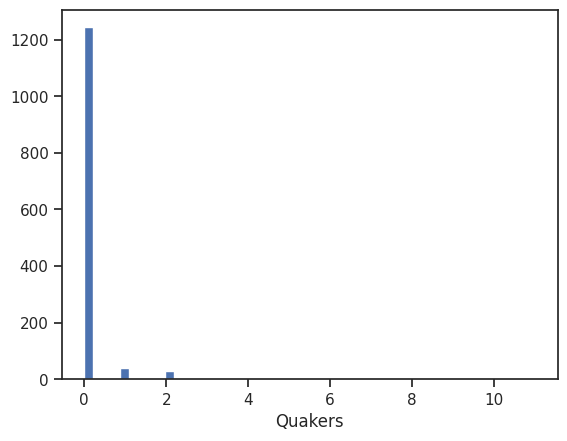

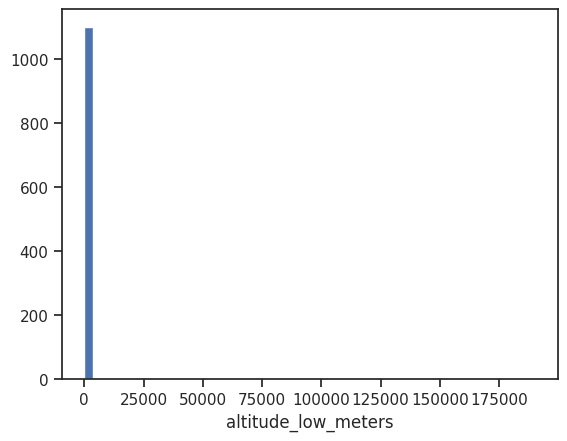

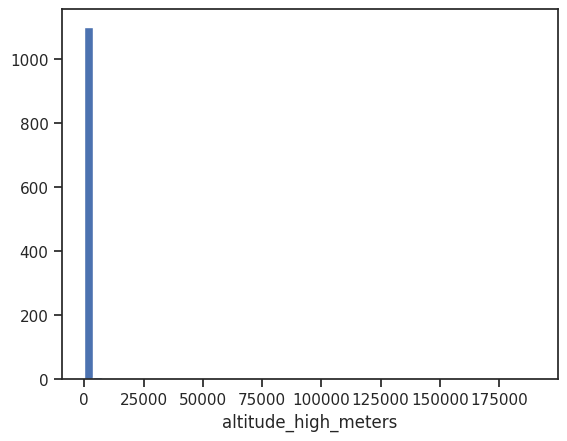

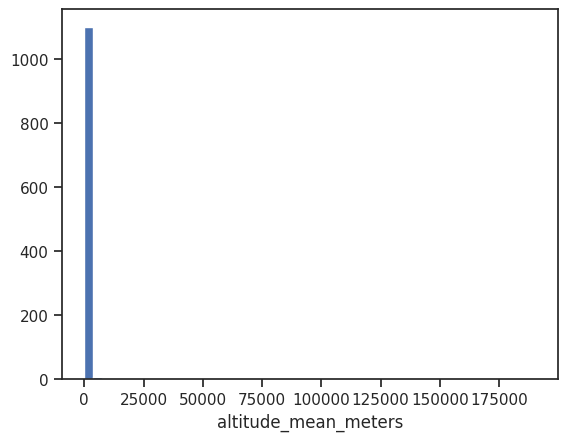

In [22]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [25]:
data_num_Quakers = data_num[['Quakers']]
data_num_Quakers.head()

,Quakers
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [35]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Quakers)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
strategies=['mean', 'median', 'most_frequent']

In [37]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Quakers)
    return data_num_imp[mask_missing_values_only]

In [38]:
strategies[0], test_num_impute(strategies[0])

('mean', array([0.17339312]))

In [40]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [41]:
data[['altitude_low_meters']].describe()

,altitude_low_meters
count,1109.000000
mean,1750.713315
std,8669.440545
min,1.000000
25%,1100.000000
50%,1310.640000
75%,1600.000000
max,190164.000000


In [42]:
test_num_impute_col(data, 'altitude_low_meters', strategies[0])

('altitude_low_meters', 'mean', 230, 1750.7133150586112, 1750.7133150586112)

### Обработка пропусков в категориальных данных

In [43]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Owner. Тип данных object. Количество пустых значений 7, 0.52%.
Колонка Country.of.Origin. Тип данных object. Количество пустых значений 1, 0.07%.
Колонка Farm.Name. Тип данных object. Количество пустых значений 359, 26.81%.
Колонка Lot.Number. Тип данных object. Количество пустых значений 1063, 79.39%.
Колонка Mill. Тип данных object. Количество пустых значений 318, 23.75%.
Колонка ICO.Number. Тип данных object. Количество пустых значений 159, 11.87%.
Колонка Company. Тип данных object. Количество пустых значений 209, 15.61%.
Колонка Altitude. Тип данных object. Количество пустых значений 226, 16.88%.
Колонка Region. Тип данных object. Количество пустых значений 59, 4.41%.
Колонка Producer. Тип данных object. Количество пустых значений 232, 17.33%.
Колонка Harvest.Year. Тип данных object. Количество пустых значений 47, 3.51%.
Колонка Owner.1. Тип данных object. Количество пустых значений 7, 0.52%.
Колонка Variety. Тип данных object. Количество пустых значений 226, 16.88%.
Колон

In [44]:
cat_temp_data = data[['Farm.Name']]
cat_temp_data.head()

,Farm.Name
0,metad plc
1,metad plc
2,"san marcos barrancas ""san cristobal cuch"
3,yidnekachew dabessa coffee plantation
4,metad plc


In [45]:
cat_temp_data['Farm.Name'].unique()

array(['metad plc', 'san marcos barrancas "san cristobal cuch',
       'yidnekachew dabessa coffee plantation', nan, 'aolme',
       'tulla coffee farm', 'fahem coffee plantation', 'el filo',
       'los cedros', 'arianna farms', 'el águila', 'toarco jaya',
       'echo coffee', 'drima zede', 'el rodeo', 'several', 'la herradura',
       'la curva', 'fazenda kaquend', 'chebonet (23) women coffee',
       'los hicaques', 'tsoustructive garden 鄒築園', 'fazenda recreio',
       'exclusive coffees s.a.', 'haider abamecha coffee plantation',
       'kangunu', 'kona pacific farmers cooperative',
       'phone number | 0911-51-08-01, email | at', 'la primavera',
       'co-op #12', 'pereira estate coffee',
       'sunshine valley estate 向陽高山咖啡', 'jungle estate', 'kaasayi',
       'ecobio colombia', 'kianjavi', 'contact | sidacoop@ethionet.net',
       'hula daddy kona coffee', 'la esperanza y anexos',
       'sipi organic coffee project', 'la berlina estate', 'valparaiso',
       'finca el limo

In [46]:
cat_temp_data[cat_temp_data['Farm.Name'].isnull()].shape

(359, 1)

In [47]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['metad plc'],
       ['metad plc'],
       ['san marcos barrancas "san cristobal cuch'],
       ...,
       ['fazenda cazengo'],
       ['various'],
       ['various']], dtype=object)

In [48]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['-', '1', '200 farms', '2000 farmers', '2000 farms',
       'a shu she coffee 阿束社咖啡莊園', 'acacia hills', 'ada farm',
       'agropecuaria quiagral', 'agua caliente', 'agua de la mariposa',
       "alicia's farm", 'alishan zou zhu yuan 阿里山鄒築園', 'amkeni', 'ampcg',
       'ano family', 'aolme', 'apollo co., ltd.', 'apollo estate',
       'aprocafi', 'arianna farms', 'aricha coop',
       'arroyo triste, arroyo triste, san jose vista hermosa',
       'asefa dukamo coffee plantation',
       'asociación aldea global jinotega', 'asoperc', 'bacofa',
       'bai he lin coffee 白鶴林咖啡莊園', 'baijiada coffee farm佰加達咖啡莊園',
       'baishencun coffee farm百勝村咖啡莊園', 'baishengcun coffee 百勝村咖啡莊園',
       'barranca de las flores', 'beneficio el torreon', 'bethel',
       'bi yun si shi yi 碧云四十一咖啡坊', 'blend', 'blue lake', 'bola de oro',
       'bsr', 'buginyanya', 'bugisu shamba', 'bulago & buginyanya',
       'bulamburi coffee farmers', 'burka coffee estate',
       'burka coffee estates', 'bushenyi',

In [49]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['metad plc'],
       ['metad plc'],
       ['san marcos barrancas "san cristobal cuch'],
       ...,
       ['fazenda cazengo'],
       ['NA'],
       ['NA']], dtype=object)

In [50]:
np.unique(data_imp3)

array(['-', '1', '200 farms', '2000 farmers', '2000 farms', 'NA',
       'a shu she coffee 阿束社咖啡莊園', 'acacia hills', 'ada farm',
       'agropecuaria quiagral', 'agua caliente', 'agua de la mariposa',
       "alicia's farm", 'alishan zou zhu yuan 阿里山鄒築園', 'amkeni', 'ampcg',
       'ano family', 'aolme', 'apollo co., ltd.', 'apollo estate',
       'aprocafi', 'arianna farms', 'aricha coop',
       'arroyo triste, arroyo triste, san jose vista hermosa',
       'asefa dukamo coffee plantation',
       'asociación aldea global jinotega', 'asoperc', 'bacofa',
       'bai he lin coffee 白鶴林咖啡莊園', 'baijiada coffee farm佰加達咖啡莊園',
       'baishencun coffee farm百勝村咖啡莊園', 'baishengcun coffee 百勝村咖啡莊園',
       'barranca de las flores', 'beneficio el torreon', 'bethel',
       'bi yun si shi yi 碧云四十一咖啡坊', 'blend', 'blue lake', 'bola de oro',
       'bsr', 'buginyanya', 'bugisu shamba', 'bulago & buginyanya',
       'bulamburi coffee farmers', 'burka coffee estate',
       'burka coffee estates', 'bush

In [51]:
data_imp3[data_imp3=='NA'].size

359

## Преобразование категориальных признаков в числовые

In [52]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,metad plc
1,metad plc
2,"san marcos barrancas ""san cristobal cuch"
3,yidnekachew dabessa coffee plantation
4,metad plc
...,...
1334,robustasa
1335,robustasa
1336,fazenda cazengo
1337,various


### Кодирование категорий целочисленными значениями (label encoding)


#### Использование LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
cat_enc['c1'].unique()

array(['metad plc', 'san marcos barrancas "san cristobal cuch',
       'yidnekachew dabessa coffee plantation', 'various', 'aolme',
       'tulla coffee farm', 'fahem coffee plantation', 'el filo',
       'los cedros', 'arianna farms', 'el águila', 'toarco jaya',
       'echo coffee', 'drima zede', 'el rodeo', 'several', 'la herradura',
       'la curva', 'fazenda kaquend', 'chebonet (23) women coffee',
       'los hicaques', 'tsoustructive garden 鄒築園', 'fazenda recreio',
       'exclusive coffees s.a.', 'haider abamecha coffee plantation',
       'kangunu', 'kona pacific farmers cooperative',
       'phone number | 0911-51-08-01, email | at', 'la primavera',
       'co-op #12', 'pereira estate coffee',
       'sunshine valley estate 向陽高山咖啡', 'jungle estate', 'kaasayi',
       'ecobio colombia', 'kianjavi', 'contact | sidacoop@ethionet.net',
       'hula daddy kona coffee', 'la esperanza y anexos',
       'sipi organic coffee project', 'la berlina estate', 'valparaiso',
       'finca e

In [55]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [56]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['-', '1', '200 farms', '2000 farmers', '2000 farms',
       'a shu she coffee 阿束社咖啡莊園', 'acacia hills', 'ada farm',
       'agropecuaria quiagral', 'agua caliente', 'agua de la mariposa',
       "alicia's farm", 'alishan zou zhu yuan 阿里山鄒築園', 'amkeni', 'ampcg',
       'ano family', 'aolme', 'apollo co., ltd.', 'apollo estate',
       'aprocafi', 'arianna farms', 'aricha coop',
       'arroyo triste, arroyo triste, san jose vista hermosa',
       'asefa dukamo coffee plantation',
       'asociación aldea global jinotega', 'asoperc', 'bacofa',
       'bai he lin coffee 白鶴林咖啡莊園', 'baijiada coffee farm佰加達咖啡莊園',
       'baishencun coffee farm百勝村咖啡莊園', 'baishengcun coffee 百勝村咖啡莊園',
       'barranca de las flores', 'beneficio el torreon', 'bethel',
       'bi yun si shi yi 碧云四十一咖啡坊', 'blend', 'blue lake', 'bola de oro',
       'bsr', 'buginyanya', 'bugisu shamba', 'bulago & buginyanya',
       'bulamburi coffee farmers', 'burka coffee estate',
       'burka coffee estates', 'bushenyi',

In [57]:
cat_enc_le

array([380, 380, 448, ..., 160, 528, 528])

In [58]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### Кодирование категорий наборами бинарных значений

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [61]:
cat_enc.shape

(1339, 1)

In [62]:
cat_enc_ohe.shape

(1339, 571)

In [63]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
cat_enc.head(10)

,c1
0,metad plc
1,metad plc
2,"san marcos barrancas ""san cristobal cuch"
3,yidnekachew dabessa coffee plantation
4,metad plc
5,various
6,various
7,aolme
8,aolme
9,tulla coffee farm


In [65]:
pd.get_dummies(cat_enc).head()

,c1_-,c1_1,c1_200 farms,c1_2000 farmers,c1_2000 farms,c1_a shu she coffee 阿束社咖啡莊園,c1_acacia hills,c1_ada farm,c1_agropecuaria quiagral,c1_agua caliente,...,c1_春風咖啡,c1_林園咖啡 lin yuan coffee,c1_王秋金,c1_眉泉莊園,c1_神谷山莊園,c1_胖胖糖,c1_谷泉咖啡莊園,c1_鄉舍咖啡 hometown coffee,c1_雅慕伊,c1_馨晴咖啡 good mood coffee
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Farm.Name_-,Farm.Name_1,Farm.Name_200 farms,Farm.Name_2000 farmers,Farm.Name_2000 farms,Farm.Name_a shu she coffee 阿束社咖啡莊園,Farm.Name_acacia hills,Farm.Name_ada farm,Farm.Name_agropecuaria quiagral,Farm.Name_agua caliente,...,Farm.Name_林園咖啡 lin yuan coffee,Farm.Name_王秋金,Farm.Name_眉泉莊園,Farm.Name_神谷山莊園,Farm.Name_胖胖糖,Farm.Name_谷泉咖啡莊園,Farm.Name_鄉舍咖啡 hometown coffee,Farm.Name_雅慕伊,Farm.Name_馨晴咖啡 good mood coffee,Farm.Name_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Масштабирование данных

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Number.of.Bags']])

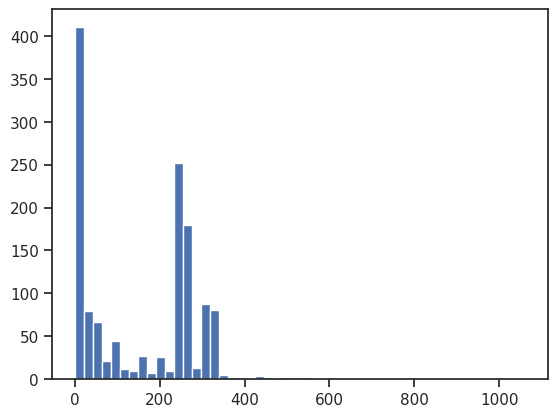

In [69]:
plt.hist(data['Number.of.Bags'], 50)
plt.show()

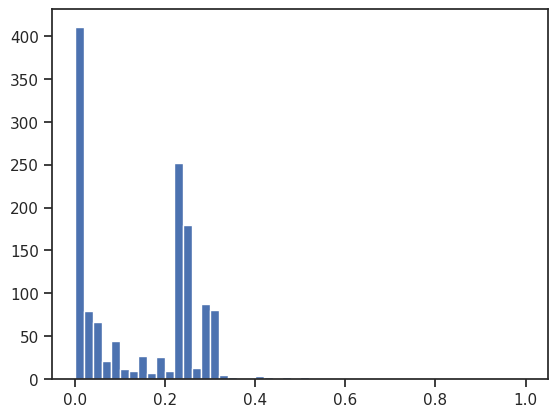

In [70]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Number.of.Bags']])

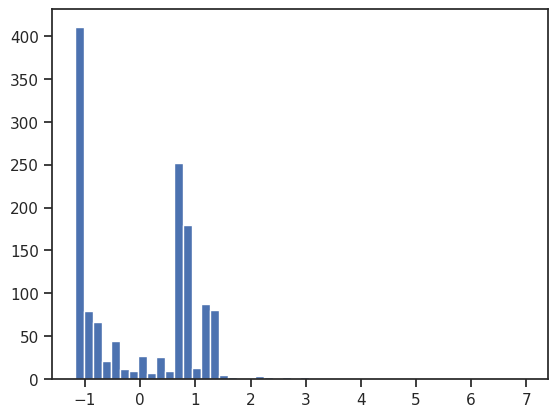

In [72]:
plt.hist(sc2_data, 50)
plt.show()